# Team 24 - Question 1

## Import statements 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.svm import SVC
import seaborn as sns

## Function definitions

In [ ]:
def mean_squared_error1(Y_true, Y_pred):
# Takes input as two numpy arrays and returns the mean squared error
# Inputs:
#     Y_true -----> True class labels
#     Y_pred -----> Predicted class labels
# Returns:
#     error -------> Mean Squared error

    error = np.sum((Y_true - Y_pred)**2)/len(Y_true)
    
    try:
        return(error[0])
    except:
        return(error)

In [ ]:
def accuracy(Y_true, Y_pred):
    
# Returns the accuracy of predicted classes
# Inputs:
#     Y_true -----> True class labels
#     Y_pred -----> Predicted class labels
# Returns:
#     tp/N -------> Accuracy of predicted class labels 

    tp = len(np.argwhere(Y_true==Y_pred))
    N  = Y_true.shape[0]
    return tp/N

In [ ]:
def decision_region(x_train, y_train, svc_clf):
    
# Plots the decision region
# Inputs:
#     x_train ---------> Training Datapoints
#     y_train ---------> Class labels for x_train
#     svc_clf --------->

# Returns:
#     None  

    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    h = .01  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    x = np.c_[xx.ravel(), yy.ravel()]
    y_pred = svc_clf.predict(x)
    support_vectors = svc_clf.support_vectors_
    y_pred = np.array(y_pred).reshape(xx.shape)
    classes = np.unique(y_train).astype(str)
    
#     plt.style.use('classic')
    plt.figure(figsize=[10,10])
    plt.pcolormesh(xx, yy, y_pred, cmap=plt.cm.Paired)
    scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
    scatter_sv = plt.scatter(support_vectors[:,0], support_vectors[:,1], c='g', edgecolors='k')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
#     plt.title("Decision Boundary: ")
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(handles=scatter.legend_elements()[0] + [scatter_sv], labels=list(map(lambda x: 'Class {}'.format(x), classes))+['Support vectors'])
    plt.show()

## Loading the Dataset and Exploring

In [ ]:
import os
os.getcwd()
os.chdir('/home/achusanjeev/PRML_Data_Contest/PA2_Datasets')

In [ ]:
df = pd.read_csv('Regression_dataset.csv')

In [ ]:
df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,Y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,Y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isna().sum()

X_1     0
X_2     0
X_3     0
X_4     0
X_5     0
X_6     0
X_7     0
X_8     0
X_9     0
X_10    0
X_11    0
X_12    0
X_13    0
Y       0
dtype: int64

In [ ]:
X = df.drop('Y',axis=1)
y = df.loc[:,'Y']

In [ ]:
# Adding a column full of 1s
X['X_0'] = 1

In [ ]:
# Performing train and test split in the ratio 80:20

np.random.seed(20)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X.loc[order[:train_N],:]
y_train = y.loc[order[:train_N]]

X_test = X.loc[order[train_N:],:]
y_test = y.loc[order[train_N:]]

## Kernel Ridge Regression 

In [ ]:
def Ridge_regression(X,y, Lambda):
# Performs Ridge Regression

# Inputs:
#     X -----> Feature Matrix
#     y -----> Class Labels
# Returns:
#     B -------> Coefficients of Ridge Regression 
    X = np.matrix(X)
    y = np.matrix(y)
    
    I = np.identity(X.shape[1])
    
    # Let B be the matrix with parameters of regression ie B.X = y

    B = np.linalg.inv(X.T*X+ Lambda* I)*(X.T*y.T)
    
    return(B)

### Linear Kernel

In [ ]:
# Tuning to find best Lambda

MSE_list1 = []
Lambda_list1 = [0,0.01,0.1,1,10,100]
for Lambda in Lambda_list1:
    B = Ridge_regression(X_train, y_train, Lambda)
    y_test_pred = np.matrix(X_test)*B
    y_test_pred = np.array(y_test_pred.T)[0] # Fixing the shape of y_test_pred to match that of y
    y_test = np.array(y_test)
    
    MSE_list1.append(mean_squared_error1(y_test,y_test_pred))

In [ ]:
Lambda_best = Lambda_list1[(np.argmin(MSE_list1))]
print(Lambda_best)

0.1


In [ ]:
# Training on Train dataset

X = df.drop('Y',axis=1)
y = df.loc[:,'Y']

# Train Test Split

# Shuffle here

X_train = X[:int(X.shape[0]*0.8)]
y_train = y[:int(X.shape[0]*0.8)]
X_test = X[int(X.shape[0]*0.8):]
y_test = y[int(X.shape[0]*0.8):]

B = Ridge_regression(X_train, y_train, Lambda_best)

y_train_pred = np.matrix(X_train)*B
y_train_pred = np.array(y_train_pred.T)[0] # Fixing the shape of y_test_pred
y_train = np.array(y_train) # Converting to array format

y_test_pred = np.matrix(X_test)*B
y_test_pred = np.array(y_test_pred.T)[0] # Fixing the shape of y_test_pred
y_test = np.array(y_test) # Converting to array format

mse_train1 = mean_squared_error1(y_train,y_train_pred)
mse_test1 = mean_squared_error1(y_test,y_test_pred)
print('Train Mean Squared Error = {}'.format(mse_train1))
print('Test Mean Squared Error = {}'.format(mse_test1))

Train Mean Squared Error = 24.154362188886484
Test Mean Squared Error = 31.405698225639853


In [ ]:
Table = tabulate([['Linear Kernel'],['Regularization Parameter'] + Lambda_list1,
['Test Mean Squared Error'] + MSE_list1], tablefmt = 'fancy_grid')

In [ ]:
print(Table)

╒══════════════════════════╤═════════╤═════════╤═════════╤═════════╤═════════╤══════════╕
│ Linear Kernel            │         │         │         │         │         │          │
├──────────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼──────────┤
│ Regularization Parameter │  0      │  0.01   │  0.1    │  1      │ 10      │ 100      │
├──────────────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼──────────┤
│ Test Mean Squared Error  │ 24.4457 │ 24.4272 │ 24.3389 │ 24.7281 │ 25.4737 │  28.4479 │
╘══════════════════════════╧═════════╧═════════╧═════════╧═════════╧═════════╧══════════╛


In [ ]:
# from sklearn.kernel_ridge import KernelRidge

In [ ]:
# clf = KernelRidge(kernel='linear')
# clf.fit(X_train,y_train)

In [ ]:
# y_train_pred = clf.predict(X_train)
# # y_train_pred = np.array(y_train_pred.T)[0] # Fixing the shape of y_test_pred
# y_train = np.array(y_train) # Converting to array format

# y_test_pred = clf.predict(X_test)
# # y_test_pred = np.array(y_test_pred.T)[0] # Fixing the shape of y_test_pred
# y_test = np.array(y_test) # Converting to array format

# mse_train1 = mean_squared_error1(y_train,y_train_pred)
# mse_test1 = mean_squared_error1(y_test,y_test_pred)
# print('Train Mean Squared Error = {}'.format(mse_train1))
# print('Test Mean Squared Error = {}'.format(mse_test1))

### Polynomial Kernel (Degree = 2)

In [ ]:
X = df.drop('Y',axis=1)
y = df.loc[:,'Y']

In [ ]:
X.columns

Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
       'X_11', 'X_12', 'X_13'],
      dtype='object')

In [ ]:
# Generating the polynomial features (Degree =2)
X_poly = X.copy()

count = 14
for i in range(len(X.columns)):
    for j in range(i,len(X.columns)):
        if i == j:
            X_poly['X_{}'.format(count)] = X[X.columns[i]]*X[X.columns[j]]
        else:
            X_poly['X_{}'.format(count)] = np.sqrt(2) * X[X.columns[i]]*X[X.columns[j]]
        count = count + 1

In [ ]:
X_poly.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_95,X_96,X_97,X_98,X_99,X_100,X_101,X_102,X_103,X_104
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,87616,6404.690381,166145.203420,2084.663928,234.09,8587.910852,107.754588,157529.6100,2795.280787,24.8004
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,58564,6091.866341,135834.929823,3128.070694,316.84,9991.164260,230.081233,157529.6100,5130.294457,83.5396
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,58564,6091.866341,134442.014317,1379.225919,316.84,9888.710144,101.447196,154315.4089,2238.848420,16.2409
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,49284,5870.966183,123896.223782,923.028908,349.69,10436.303535,77.750633,155732.8369,1640.787828,8.6436
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,49284,5870.966183,124608.902565,1673.382340,349.69,10496.335486,140.956080,157529.6100,2991.736264,28.4089


In [ ]:
# Adding a column full of 1s
X_poly['X_0'] = 1

In [ ]:
# Performing train and test split in the ratio 80:20

np.random.seed(20)
N = X_poly.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X_poly.loc[order[:train_N],:]
y_train = y.loc[order[:train_N]]

X_test = X_poly.loc[order[train_N:],:]
y_test = y.loc[order[train_N:]]

In [ ]:
# Tuning to find best Lambda

MSE_list2 = []
Lambda_list2 = [0,0.01,0.1,1,10,100]
for Lambda in Lambda_list2:
    B = Ridge_regression(X_train, y_train, Lambda)
    y_test_pred = np.matrix(X_test)*B
    y_test_pred = np.array(y_test_pred.T)[0] # Fixing the shape of y_test_pred
    y_test = np.array(y_test)
    
    MSE_list2.append(mean_squared_error1(y_test,y_test_pred))

In [ ]:
Table = tabulate([['Polynomial Kernel'],['Regularization Parameter'] + Lambda_list2,
['Test Mean Squared Error'] + MSE_list2], tablefmt = 'fancy_grid')

In [ ]:
print(Table)

╒══════════════════════════╤══════════╤══════════╤══════════╤══════════╤═══════════╤════════════╕
│ Polynomial Kernel        │          │          │          │          │           │            │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼───────────┼────────────┤
│ Regularization Parameter │ 0        │ 0.01     │ 0.1      │ 1        │ 10        │ 100        │
├──────────────────────────┼──────────┼──────────┼──────────┼──────────┼───────────┼────────────┤
│ Test Mean Squared Error  │ 0.495153 │ 0.495153 │ 0.495153 │ 0.495152 │  0.495145 │   0.495096 │
╘══════════════════════════╧══════════╧══════════╧══════════╧══════════╧═══════════╧════════════╛


In [ ]:
Lambda_best = Lambda_list2[(np.argmin(MSE_list2))]
print(Lambda_best)

1000


In [ ]:
# Training on Train dataset

# Train Test Split

# Shuffle here

np.random.seed(20)
N = X_poly.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X_poly.loc[order[:train_N],:]
y_train = y.loc[order[:train_N]]

X_test = X_poly.loc[order[train_N:],:]
y_test = y.loc[order[train_N:]]

B = Ridge_regression(X_train, y_train, Lambda_best)

y_train_pred = np.matrix(X_train)*B
y_train_pred = np.array(y_train_pred.T)[0] # Fixing the shape of y_test_pred
y_train = np.array(y_train) # Converting to array format

y_test_pred = np.matrix(X_test)*B
y_test_pred = np.array(y_test_pred.T)[0] # Fixing the shape of y_test_pred
y_test = np.array(y_test) # Converting to array format

mse_train2 = mean_squared_error1(y_train,y_train_pred)
mse_test2 = mean_squared_error1(y_test,y_test_pred)
print('Train Mean Squared Error = {}'.format(mse_train2))
print('Test Mean Squared Error = {}'.format(mse_test2))

Train Mean Squared Error = 7.100055997748253
Test Mean Squared Error = 10.972806640671546


### Constructing Table of Errors

In [ ]:
Table = tabulate([['Linear',mse_train1, mse_test1],
['Polynomial',mse_train2, mse_test2]],
                 headers=['Kernel','Train Error','Test Error'], tablefmt = 'fancy_grid')

In [ ]:
print(Table)

╒════════════╤═══════════════╤══════════════╕
│ Kernel     │   Train Error │   Test Error │
╞════════════╪═══════════════╪══════════════╡
│ Linear     │      24.1544  │      31.4057 │
├────────────┼───────────────┼──────────────┤
│ Polynomial │       7.10006 │      10.9728 │
╘════════════╧═══════════════╧══════════════╛


The polynomial kernel works better than linear kernel in this case. The reason can be attributed to the extra features. Transformation into polynomial kernel allows us to model more accurately than in linear kernel.
The only issue is the problem of overfitting. However, since we are doing ridge regression, we are able to regularize and limit the overfitting

## Kernel Logistic Regression and Kernel SVM

### Loading and Visualizing the values

In [ ]:
df2 = pd.read_csv('/home/achusanjeev/PRML_Data_Contest/PA2_Datasets/Dataset_3/Dataset_3_Team_24.csv')

In [ ]:
df2.head()

,# x_1,x_2,Class_label
0,0.556383,-0.249476,1
1,-0.237175,0.534400,1
2,0.182019,-0.968976,0
3,-0.663934,0.777924,0
4,-0.855293,-0.272750,0


In [ ]:
df2.columns = ['X1','X2','y']
X = df2[['X1','X2']]
y = df2['y']

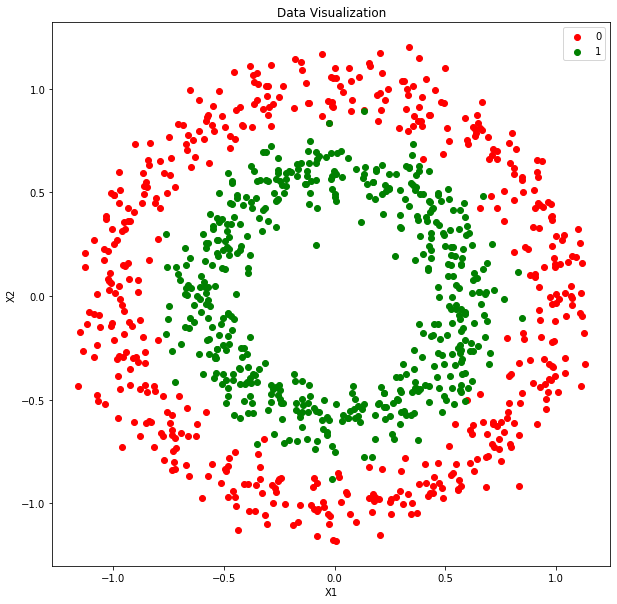

In [ ]:
cdict = {0: 'red', 1: 'green'}

plt.figure(figsize=[10,10])

for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X['X1'].loc[ix], X['X2'].loc[ix], c = cdict[g], label = g)
    
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Visualization')

plt.legend()
plt.show()

### Logistic Regression (Function Definitions)

In [ ]:
# Performing gradient descent for logistic regression

In [ ]:
def sigmoid(z):
    
# Returns the sigmoid of input value
# Inputs:
#     z -----> Input value
# Returns:
#     Sigmoid of the input value
    return 1 / (1 + np.exp(-z))


In [ ]:
def predict(X, w):
    
# Returns the prediction of the label
#     X -----> Feature Vector
#     w -----> Weights Vector

# Returns:
#     Prediction of label
    z = X * w
    return sigmoid(z)

# correct

In [ ]:
def cost_function(X, y, w):

# Returns the Cost Function
# Inputs:
#     X -----> Feature Vector
#     w -----> Weights Vector
#     y -----> Class labels

# Returns:
#     Cost -----> Cost function value

    y_pred = predict(X, w) 
    cost = np.mean(-y.T * np.log(y_pred) - (1-y).T*np.log(1-y_pred))

    return cost

In [ ]:
def update_weights(X, y, w, alpha):
    
# Updates the weights using the gradient descent approach
# Inputs:
#     X -----> Feature Vector
#     w -----> Weights Vector
#     y -----> Class labels
#     alpha -----> Learning Rate

# Returns:
#     w -----> Updated weights
    
    n = len(y)
    y_pred = predict(X, w)
    gradient = X.T*(y_pred - y)
    w = w - gradient * alpha/n

    return w

In [ ]:
# Training
def logistic_regression(X, y, w, alpha, iters):
    
# Performs logistic regression and outputs weights and cost functions

# Inputs:
#     X -----> Feature Vector
#     w -----> Weights Vector
#     y -----> Class labels
#     alpha -----> Learning Rate
#     iters -----> Number of times to update weights

# Returns:
#     w -----> Updated weights
#     costs ----> Previous costs
    
    costs = []

    for i in range(iters):
        w = update_weights(X, y, w, alpha)

        cost = cost_function(X, y, w)
        costs.append(cost)

        # Log Progress
        if (i % 500 == 0):
            print("For iteration {}, cost is {}".format(i,cost))

    return w, costs

### Logistic Regression (Linear Kernel)

In [ ]:
# Creating an extra columns with all ones for logistic regression

X_log = pd.DataFrame(np.ones(X.shape[0]))
X_log['X_1'] = X['X1'].copy()
X_log['X_2'] = X['X2'].copy()
X_log.columns = ['X0','X1','X2']

In [ ]:
X_log.head()

,X0,X1,X2
0,1.0,0.556383,-0.249476
1,1.0,-0.237175,0.534400
2,1.0,0.182019,-0.968976
3,1.0,-0.663934,0.777924
4,1.0,-0.855293,-0.272750


In [ ]:
# Performing train and test split in the ratio 80:20

np.random.seed(20)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X_log.loc[order[:train_N],:]
y_train = y.loc[order[:train_N]]

X_test = X_log.loc[order[train_N:],:]
y_test = y.loc[order[train_N:]]

In [ ]:
# Converting the dataframes to matrices for the purpose of the model
X_log_matrix = np.matrix(X_train)
y_log_matrix = np.matrix(y_train).T

In [ ]:
# Running the gradient descent model

w, costs = logistic_regression(X_log_matrix, y_log_matrix, w = np.matrix([[2], [2], [2]]), alpha = 0.1, iters = 10000)

For iteration 0, cost is 1037.172690565222
For iteration 500, cost is 554.5121007064695
For iteration 1000, cost is 554.4366337903964
For iteration 1500, cost is 554.4366225399531
For iteration 2000, cost is 554.4366225382564
For iteration 2500, cost is 554.4366225382562
For iteration 3000, cost is 554.4366225382562
For iteration 3500, cost is 554.4366225382562
For iteration 4000, cost is 554.4366225382562
For iteration 4500, cost is 554.4366225382563
For iteration 5000, cost is 554.4366225382563
For iteration 5500, cost is 554.4366225382563
For iteration 6000, cost is 554.4366225382563
For iteration 6500, cost is 554.4366225382563
For iteration 7000, cost is 554.4366225382563
For iteration 7500, cost is 554.4366225382563
For iteration 8000, cost is 554.4366225382563
For iteration 8500, cost is 554.4366225382563
For iteration 9000, cost is 554.4366225382563
For iteration 9500, cost is 554.4366225382563


In [ ]:
print('The feature matrix is \n{}'.format(w))

The feature matrix is 
[[ 0.00547518]
 [ 0.00494211]
 [-0.04669172]]


In [ ]:
#Getting train and test accuracy

y_pred_train = 1*(sigmoid(X_log_matrix*w)>0.5)
accuracy_train1 = accuracy(y_train,np.array(y_pred_train.T)[0])

X_log_test = np.matrix(X_test)
y_pred_test = 1*(sigmoid(X_log_test*w)>0.5)
accuracy_test1 = accuracy(y_test,np.array(y_pred_test.T)[0])

print('Train accuracy for linear kernel logistic regression is {}'.format(accuracy_train1))
print('Test accuracy for linear kernel logistic regression is {}'.format(accuracy_test1))

Train accuracy for linear kernel logistic regression is 0.525
Test accuracy for linear kernel logistic regression is 0.465


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


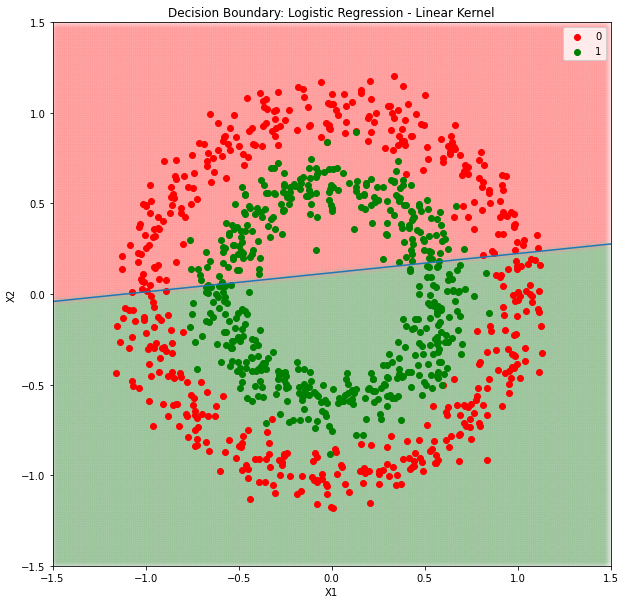

In [ ]:
#Plotting Decision Boundary for the whole data

xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))

x_plot = np.c_[xx.ravel(), yy.ravel()]
y_plot = pd.Series(np.array(1*(sigmoid(w[0]+ x_plot*w[1:])>0.5).T)[0])

# Plotting decision boundary

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}


plt.scatter(x_plot[:,0], x_plot[:,1], c = y_plot.apply(lambda x: cdict[x]), s =100, alpha=0.01)
plt.title("Dataset Visualization")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')



# Plotting decision boundary

x_plot = np.linspace(-1.5,1.5,1000)
y_plot = np.array((-w[0]- w[1]*x_plot)/w[2]).T
cdict = {0: 'red', 1: 'green'}

for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X['X1'].loc[ix], X['X2'].loc[ix], c = cdict[g], label = g)
plt.legend()  
    
plt.title("Decision Boundary: Logistic Regression - Linear Kernel")
plt.plot(x_plot, y_plot)
plt.xlim(right=1.5)
plt.xlabel('X1')
plt.ylabel('X2')


plt.show()

### Logistic Regression (Polynomial Kernel)

In [ ]:
# Generating the polynomial features
X_poly = X.copy()

count = 3

for i in range(len(X.columns)):
    for j in range(i,len(X.columns)):
        if i == j:
            X_poly['X{}'.format(count)] = X[X.columns[i]]*X[X.columns[j]]
        else:
            X_poly['X{}'.format(count)] = np.sqrt(2) * X[X.columns[i]]*X[X.columns[j]]
        count = count + 1

In [ ]:
# Creating an extra column with all ones for logistic regression
X_log = pd.DataFrame(np.ones(X.shape[0]))
X_log.columns = ['X0']

for i in range(1,6):
    X_log['X{}'.format(i)] = X_poly['X{}'.format(i)].copy()

In [ ]:
X_log.head()

,X0,X1,X2,X3,X4,X5
0,1.0,0.556383,-0.249476,0.309562,-0.196299,0.062238
1,1.0,-0.237175,0.534400,0.056252,-0.179246,0.285584
2,1.0,0.182019,-0.968976,0.033131,-0.249428,0.938915
3,1.0,-0.663934,0.777924,0.440808,-0.730427,0.605166
4,1.0,-0.855293,-0.272750,0.731526,0.329909,0.074393


In [ ]:
# Train Test Split

# Shuffle here

# Performing train and test split in the ratio 80:20

np.random.seed(20)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X_log.loc[order[:train_N],:]
y_train = y.loc[order[:train_N]]

X_test = X_log.loc[order[train_N:],:]
y_test = y.loc[order[train_N:]]

In [ ]:
# Converting into matrix form for logistic regression

X_log_matrix = np.matrix(X_train)
y_log_matrix = np.matrix(y_train).T

In [ ]:
w, cost_history = logistic_regression(X_log_matrix, y_log_matrix, w = np.matrix([[0],[0],[0],[0],[0],[0]]), alpha = 0.1, iters = 10000)

For iteration 0, cost is 553.4261756117558
For iteration 500, cost is 301.1031195999344
For iteration 1000, cost is 210.75890603623378
For iteration 1500, cost is 166.21158251497087
For iteration 2000, cost is 139.79983691227454
For iteration 2500, cost is 122.27977797769586
For iteration 3000, cost is 109.76540840084587
For iteration 3500, cost is 100.34923999296826
For iteration 4000, cost is 92.98679412611611
For iteration 4500, cost is 87.05804690873319
For iteration 5000, cost is 82.17142036720114
For iteration 5500, cost is 78.06720323608104
For iteration 6000, cost is 74.5661780748669
For iteration 6500, cost is 71.54055725938066
For iteration 7000, cost is 68.89668496474877
For iteration 7500, cost is 66.56429563949418
For iteration 8000, cost is 64.48959910147664
For iteration 8500, cost is 62.63068894987137
For iteration 9000, cost is 60.95441048044545
For iteration 9500, cost is 59.434173124074135


In [ ]:
print('The weights of the logistic regression are \n{}'.format(w))

The weights of the logistic regression are 
[[  7.55132436]
 [  0.08882738]
 [  0.01231605]
 [-11.21137619]
 [ -0.36225454]
 [-11.21114686]]


In [ ]:
#Getting train and test accuracy

y_pred_train = 1*(sigmoid(X_log_matrix*w)>0.5)
accuracy_train2 = accuracy(y_train,np.array(y_pred_train.T)[0])

X_log_test = np.matrix(X_test)
y_pred_test = 1*(sigmoid(X_log_test*w)>0.5)
accuracy_test2 = accuracy(y_test,np.array(y_pred_test.T)[0])

print('Train accuracy for linear kernel logistic regression is {}'.format(accuracy_train1))
print('Test accuracy for linear kernel logistic regression is {}'.format(accuracy_test1))

Train accuracy for linear kernel logistic regression is 0.525
Test accuracy for linear kernel logistic regression is 0.465


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [ ]:
# Creating a meshgrid and converting it into polynomial kernel so as to predict its class (DECISION BOUNDARY)
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
x_plot.columns = ['X_1','X_2']
x_poly_plot = x_plot.copy()

count = 3
for i in range(len(x_plot.columns)):
    for j in range(i,len(x_plot.columns)):
        if i == j:
            x_poly_plot['X_{}'.format(count)] = x_plot[x_plot.columns[i]]*x_plot[x_plot.columns[j]]
        else:
            x_poly_plot['X_{}'.format(count)] = np.sqrt(2) * x_plot[x_plot.columns[i]]* x_plot[x_plot.columns[j]]
        count = count + 1

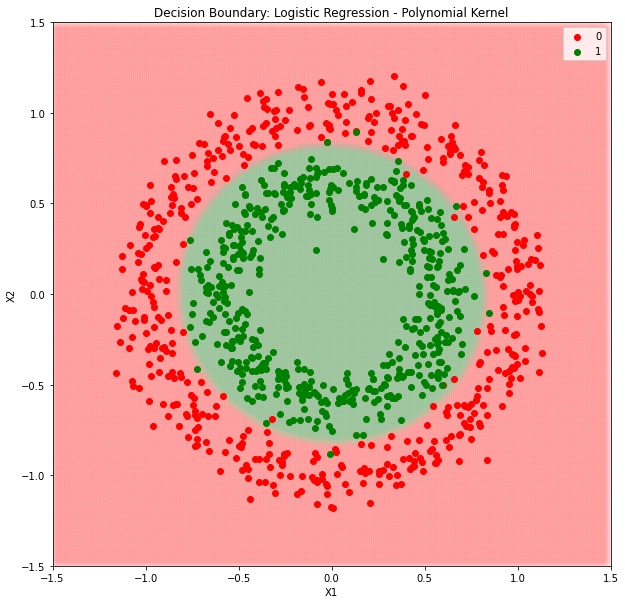

In [ ]:
# Plotting decision boundary
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = pd.Series(np.array(1*(1*(sigmoid(np.matrix(x_poly_plot)*w[1:] + w[0])>0.5))).T[0])

plt.scatter(x_plot[:,0], x_plot[:,1], c = y_plot.apply(lambda x: cdict[x]), s =100, alpha=0.01)
plt.title("Dataset Visualization")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X['X1'].loc[ix], X['X2'].loc[ix], c = cdict[g], label = g)
plt.legend()  
    
plt.title("Decision Boundary: Logistic Regression - Polynomial Kernel")

plt.xlim(right=1.5)
plt.xlabel('X1')
plt.ylabel('X2')


plt.show()

### SVM

In [ ]:
df2.columns = ['X1','X2','y']
X = df2[['X1','X2']]
y = df2['y']

np.random.seed(20)
N = X.shape[0]
train_N = int(0.8*N)
order = list(range(N))
np.random.shuffle(order)

X_train = X.loc[order[:train_N],:]
y_train = y.loc[order[:train_N]]

X_test = X.loc[order[train_N:],:]
y_test = y.loc[order[train_N:]]

### SVM (Linear Kernel)

In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_train_svm1 = svm_linear.predict(X_train)
y_test_svm1 = svm_linear.predict(X_test)

accuracy_train_svm1 = accuracy(y_train,y_train_svm1)
accuracy_test_svm1 = accuracy(y_test,y_test_svm1)
print('Training accuracy = {}'.format(accuracy_train_svm1))
print('Testing accuracy = {}'.format(accuracy_test_svm1))

Training accuracy = 0.535
Testing accuracy = 0.475


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


### SVM (Polynomial Kernel [Degree =2])

In [ ]:
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X_train,y_train)
y_train_svm2 = svm_poly.predict(X_train)
y_test_svm2 = svm_poly.predict(X_test)

accuracy_train_svm2 = accuracy(y_train,y_train_svm2)
accuracy_test_svm2 = accuracy(y_test,y_test_svm2)
print('Training accuracy = {}'.format(accuracy_train_svm2))
print('Testing accuracy = {}'.format(accuracy_test_svm2))

Training accuracy = 0.98875
Testing accuracy = 0.97


/home/achusanjeev/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/achusanjeev/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


### Plotting the decision boundaries of all the SVM Models as well as support vectors

In [ ]:
X_train_values = X_train.values
y_train_values = y_train.values
X_test_values = X_test.values
y_test_values = y_test.values

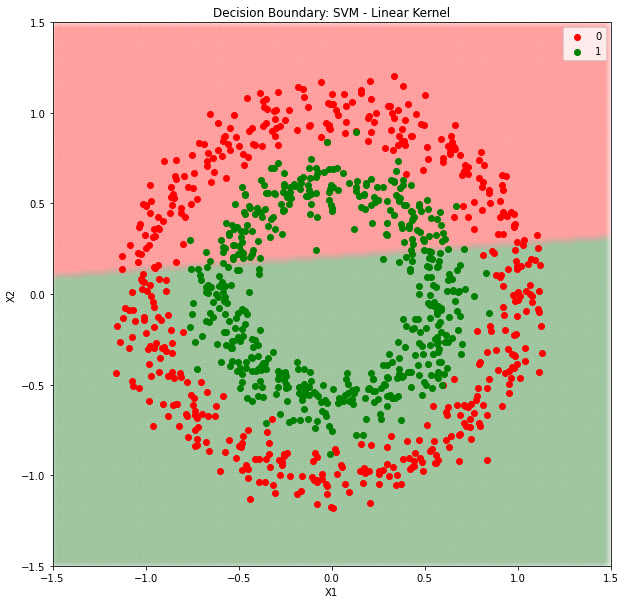

In [ ]:
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = svm_linear.predict(x_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =100, alpha=0.01)

plt.title("Decision Boundary: SVM - Linear Kernel")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X.iloc[:,0].iloc[ix], X.iloc[:,1].iloc[ix], c = cdict[g], label = g)
plt.legend()  

plt.xlabel('X1')
plt.ylabel('X2')


plt.show() 

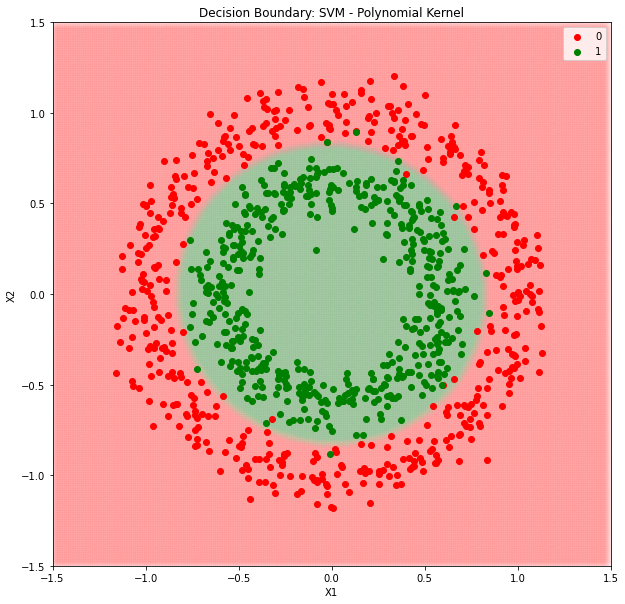

In [ ]:
xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
x_plot = np.c_[xx.ravel(), yy.ravel()]

plt.figure(figsize=[10,10])

cdict = {0: 'red', 1: 'green'}

y_plot = svm_poly.predict(x_plot).astype(int)

plt.scatter(x_plot[:,0], x_plot[:,1], c = pd.Series(y_plot).apply(lambda x: cdict[x]), s =100, alpha=0.01)

plt.title("Decision Boundary: SVM - Polynomial Kernel")
plt.xlim(left=-1.5, right =1.5)
plt.ylim(bottom=-1.5, top =1.5)
plt.xlabel('X1')
plt.ylabel('X2')


for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X.iloc[:,0].iloc[ix], X.iloc[:,1].iloc[ix], c = cdict[g], label = g)
plt.legend()  

plt.xlabel('X1')
plt.ylabel('X2')


plt.show() 

/home/achusanjeev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


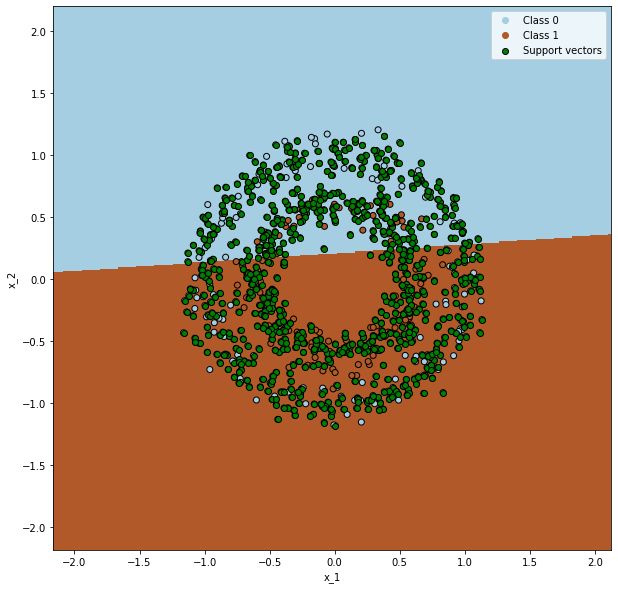

In [ ]:
decision_region(X.values, y.values, svm_linear)

In [ ]:
# decision_region(X_test_values, y_test.values, svm_linear)

/home/achusanjeev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


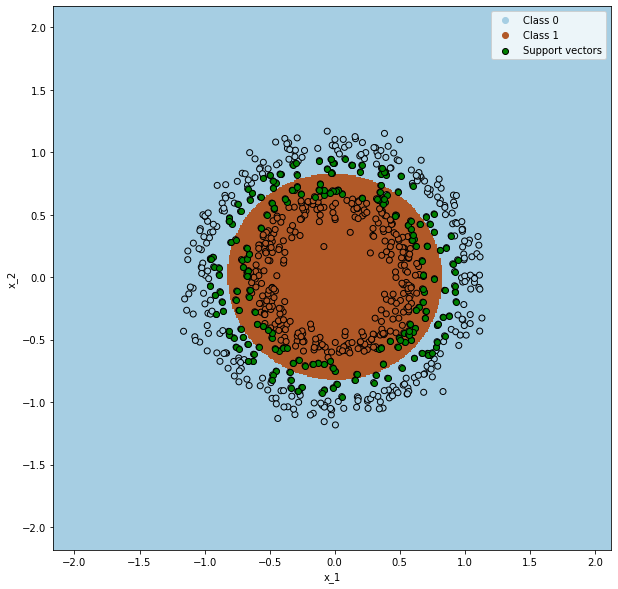

In [ ]:
decision_region(X_train_values, y_train.values, svm_poly)

### Tabulating the accuracy scores of all the models

In [ ]:
Table = tabulate(
    [['Kernel Logistic Regression', 'Linear', accuracy_train1 ,accuracy_test1],
    ['', 'Polynomial', accuracy_train2 ,accuracy_test2],
    ['SVM ', 'Linear', accuracy_train_svm1 ,accuracy_test_svm1],
    ['', 'Polynomial', accuracy_train_svm2 ,accuracy_test_svm2]], 
    headers= ['Model', 'Kernel', 'Train Accuracy', 'Test Accuracy'], tablefmt='fancy_grid')                     

In [ ]:
print(Table)

╒════════════════════════════╤════════════╤══════════════════╤═════════════════╕
│ Model                      │ Kernel     │   Train Accuracy │   Test Accuracy │
╞════════════════════════════╪════════════╪══════════════════╪═════════════════╡
│ Kernel Logistic Regression │ Linear     │          0.525   │           0.465 │
├────────────────────────────┼────────────┼──────────────────┼─────────────────┤
│                            │ Polynomial │          0.98875 │           0.97  │
├────────────────────────────┼────────────┼──────────────────┼─────────────────┤
│ SVM                        │ Linear     │          0.535   │           0.475 │
├────────────────────────────┼────────────┼──────────────────┼─────────────────┤
│                            │ Polynomial │          0.98875 │           0.97  │
╘════════════════════════════╧════════════╧══════════════════╧═════════════════╛


In both kernel ridge regression and kernel SVM, we can see that polynomial kernel is much better than linear kernel. The reason for this can be easily identified from the plots. The data is not linearly separable. By converting them into a polynomial kernel, we will be able to create decision boundaries so as to properly classify them hence giving much better accuracies